In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\nkemd\Documents\student_habits_performance.csv")

# Clean Data

In [6]:
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Exploring the dataset to see the type of values and what to use to generate insights.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [9]:
df.shape

(1000, 16)

In [10]:
df.count()

student_id                       1000
age                              1000
gender                           1000
study_hours_per_day              1000
social_media_hours               1000
netflix_hours                    1000
part_time_job                    1000
attendance_percentage            1000
sleep_hours                      1000
diet_quality                     1000
exercise_frequency               1000
parental_education_level          909
internet_quality                 1000
mental_health_rating             1000
extracurricular_participation    1000
exam_score                       1000
dtype: int64

In [11]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

So there are 1000 rows and 16 columns. Every column has a value in it except Parental education Level which has 91 missing values.

In [13]:
df.duplicated().sum()

0

In [14]:
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace = True)


# Use median for numerical data (Age) with outliers.

# Use mode for categorical data (gender) or numerical data when a common value makes sense.

I used .mode because the values in the parental_education_level column are categorical and working with the most occuring object would make more sense than with median which is used for more integer values.

In [16]:
df.isnull().sum() # Ran it again to check if the null values have been replaced

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [17]:
df.describe() # to summarize my data

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# Visualize Data

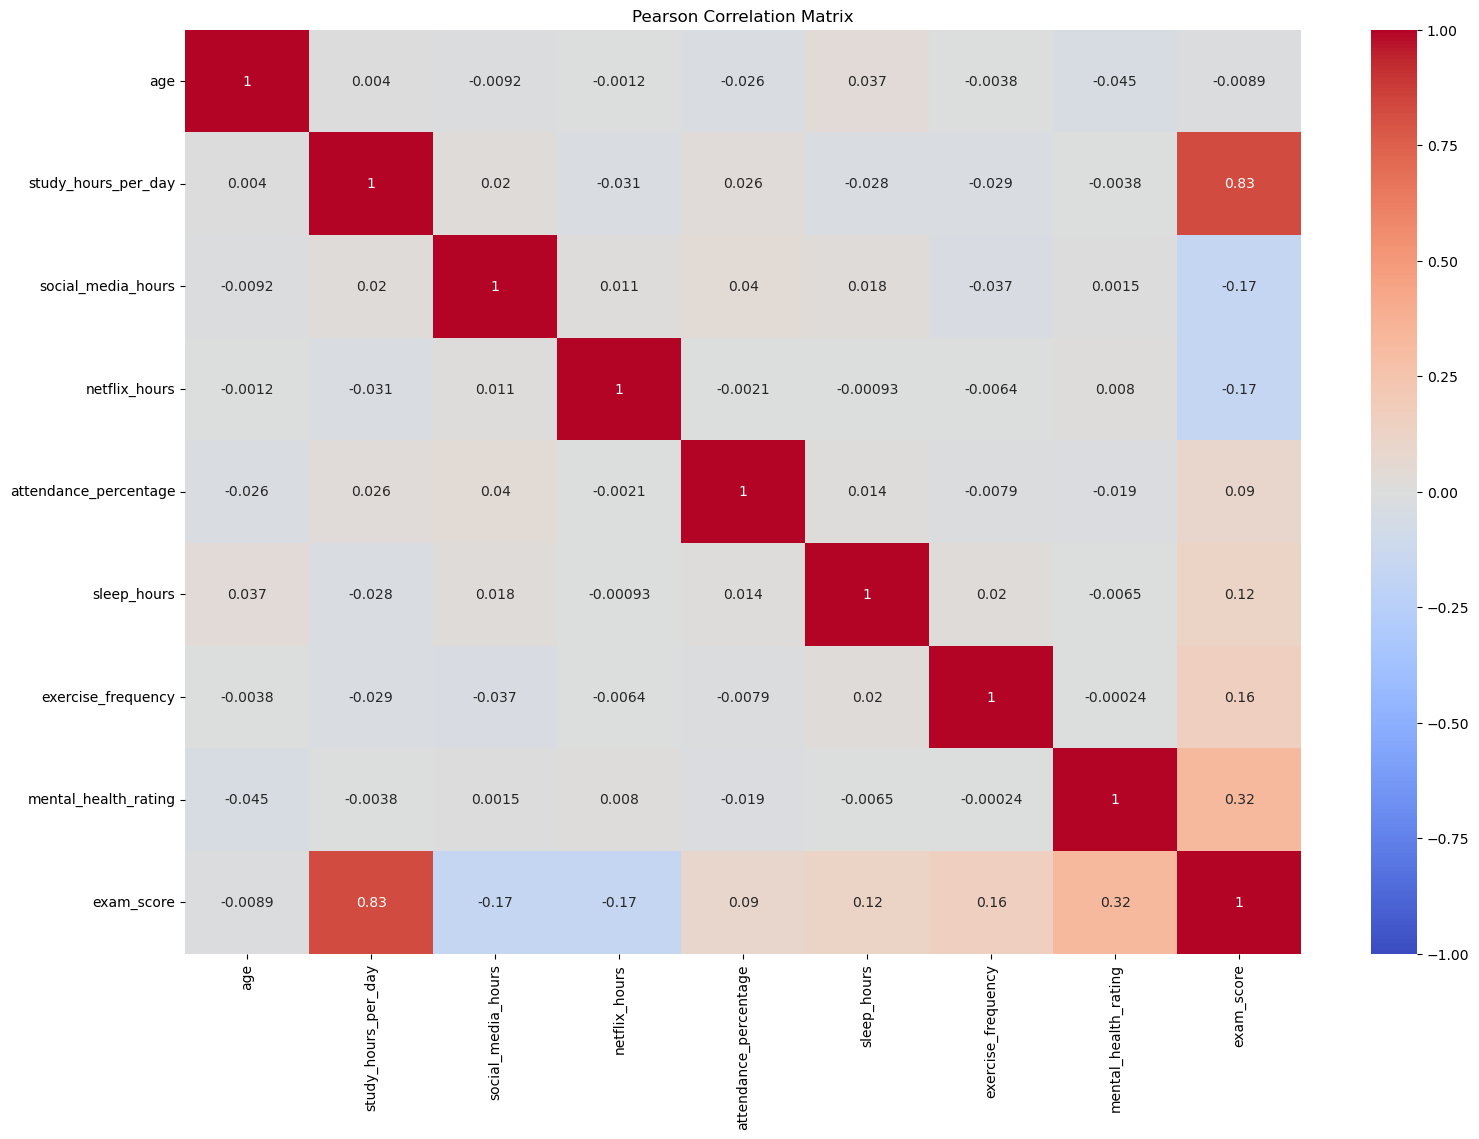

In [19]:
plt.figure(figsize=(18, 12))

corr = df.select_dtypes(include=np.number).corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

Finding a correltation between columns would help paint a clearer a picture on what variable affects the other. According to the correlation matrix theres a strong between exam scores and hours of study. Compared to the others  which are weak (<+-0.4) this value (0.83) will show a clear relationship between the two

In [21]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [22]:
# Spearman Correlation (Non-linear Relationships)
spearman_corr = df.select_dtypes(include=np.number).corr(method='spearman')

# Here we are printing top 5 features most correlated with 'exam scores'
print("\nSpearman Correlation (Top Relationships stongly correlated to exam scores):")
print(spearman_corr['exam_score'].sort_values(ascending=False).head(6))


Spearman Correlation (Top Relationships stongly correlated to exam scores):
exam_score               1.000000
study_hours_per_day      0.812078
mental_health_rating     0.323364
exercise_frequency       0.150205
sleep_hours              0.123396
attendance_percentage    0.093898
Name: exam_score, dtype: float64


Text(0, 0.5, 'Exam score (Continuous)')

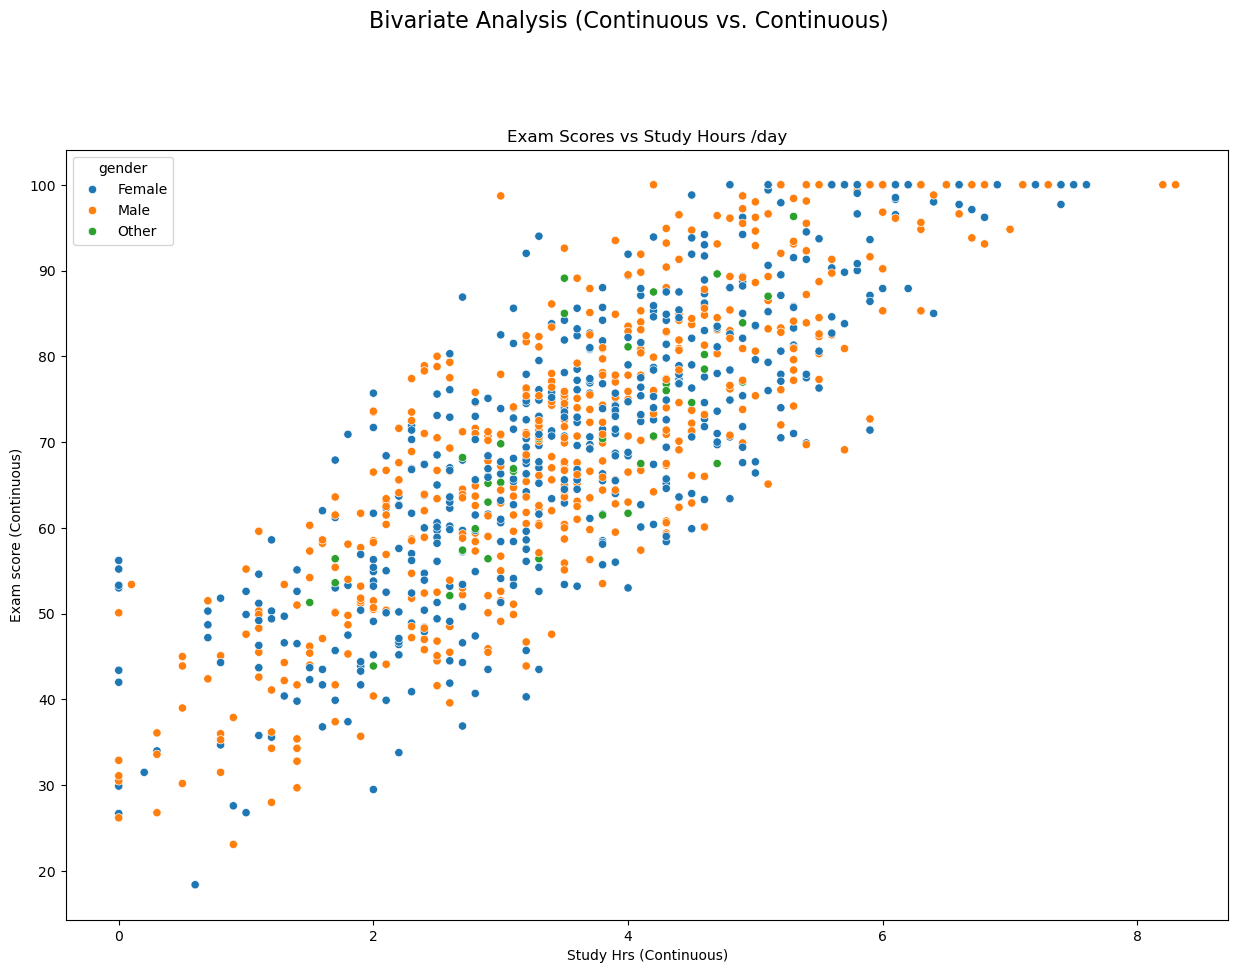

In [23]:
plt.figure(figsize=(15, 10))
plt.suptitle('Bivariate Analysis (Continuous vs. Continuous)', y=1.02, fontsize=16)
sns.scatterplot(
    data=df,         # Data source
    x='study_hours_per_day',       
    y='exam_score',        
    hue='gender',  # Color points based on gender
    alpha=1        # Set transparency for better visibility
)
plt.title('Exam Scores vs Study Hours /day')
plt.xlabel('Study Hrs (Continuous)')

plt.ylabel('Exam score (Continuous)')


According to the legend on the scatterplot, theres another gender variable 'other'

In [25]:
# Display unique gender values
print(df['gender'].unique())


['Female' 'Male' 'Other']


In [26]:
# Filter gender values that are NOT 'Male' or 'Female'
filtered_df = df[~df['gender'].isin(['Male', 'Female'])]

print(filtered_df.count())


student_id                       42
age                              42
gender                           42
study_hours_per_day              42
social_media_hours               42
netflix_hours                    42
part_time_job                    42
attendance_percentage            42
sleep_hours                      42
diet_quality                     42
exercise_frequency               42
parental_education_level         42
internet_quality                 42
mental_health_rating             42
extracurricular_participation    42
exam_score                       42
dtype: int64


There are 42 people whose gender is classified as 'other'. Since gender is neded for categorical analysis (grouping), I will have to drop the 42 rows with 'other' to avoid skewed data. 

In [28]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
# This removes rows where gender is "Other" without creating a new DataFrame.

In [29]:
# Group by study hour ranges
df['StudyGroup'] = pd.cut(df['study_hours_per_day'], bins=[0,2,4,6,8,10], labels=['0-2','2-4','4-6','6-8','8-10'])
print(df.groupby('StudyGroup')['exam_score'].mean())


StudyGroup
0-2      47.432117
2-4      65.962963
4-6      82.055082
6-8      97.661905
8-10    100.000000
Name: exam_score, dtype: float64


In [30]:
df.head(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,StudyGroup
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,NaN
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,6-8
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0-2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     958 non-null    object  
 1   age                            958 non-null    int64   
 2   gender                         958 non-null    object  
 3   study_hours_per_day            958 non-null    float64 
 4   social_media_hours             958 non-null    float64 
 5   netflix_hours                  958 non-null    float64 
 6   part_time_job                  958 non-null    object  
 7   attendance_percentage          958 non-null    float64 
 8   sleep_hours                    958 non-null    float64 
 9   diet_quality                   958 non-null    object  
 10  exercise_frequency             958 non-null    int64   
 11  parental_education_level       958 non-null    object  
 12  internet_quality               958 non-nu

Text(0, 0.5, 'Exam scores (Continuous)')

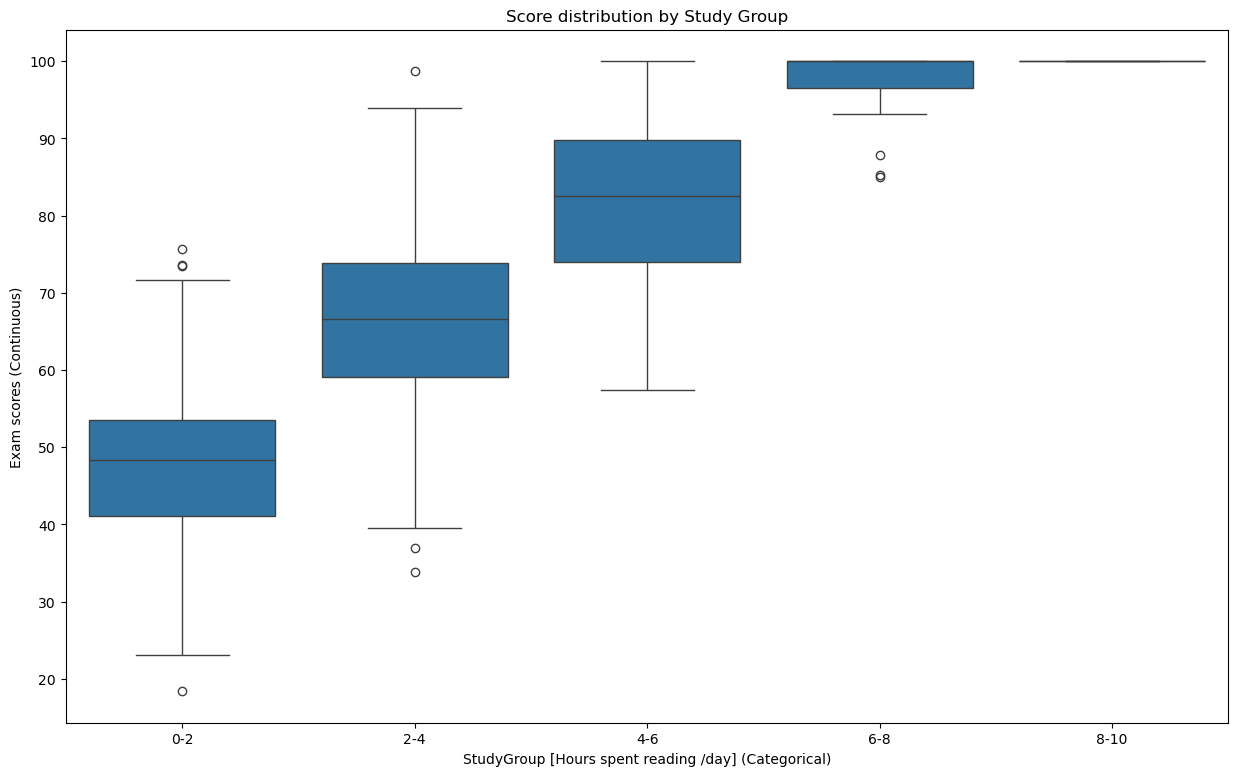

In [32]:
plt.figure(figsize=(15, 9))

# boxplot to compare exam score distribution across study groups, colored by gender
sns.boxplot(data=df, x='StudyGroup', y='exam_score')

# Set the title of the plot
plt.title('Score distribution by Study Group')

plt.xlabel('StudyGroup [Hours spent reading /day] (Categorical)')

plt.ylabel('Exam scores (Continuous)')

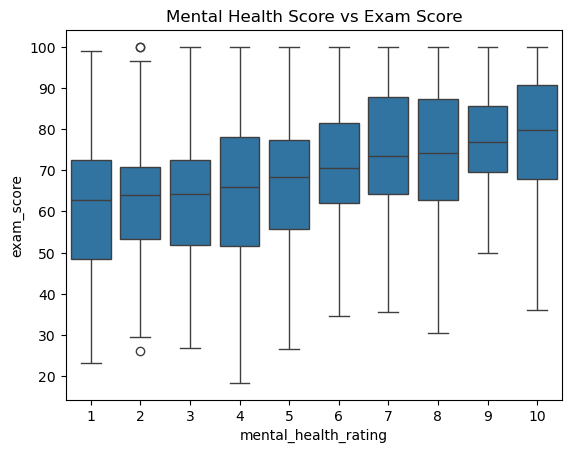

In [33]:
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title("Mental Health Score vs Exam Score")
plt.show()

The higher the mental health rating the higher the exam score. However the relationship is a weak positive correlation. 

In [35]:
# Define performance tiers
df['Performance'] = pd.qcut(df['exam_score'], q=3, labels=['Low', 'Medium', 'High'])
df.head(4)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,StudyGroup,Performance
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,NaN,Low
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,6-8,High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0-2,Low
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0-2,Low


The crosstab shows a heatmap comparing the students quality of diet with their performance. It shows that most of the students have a fair diet

In [64]:
df['SleepGroup'] = pd.cut(df['sleep_hours'], bins=[0,2,4,6,8,10], labels=['0-2','2-4','4-6','6-8','8-10'])
print(df.groupby('SleepGroup')['exam_score'].mean())

SleepGroup
0-2           NaN
2-4     59.895455
4-6     67.949851
6-8     70.650499
8-10    71.575000
Name: exam_score, dtype: float64


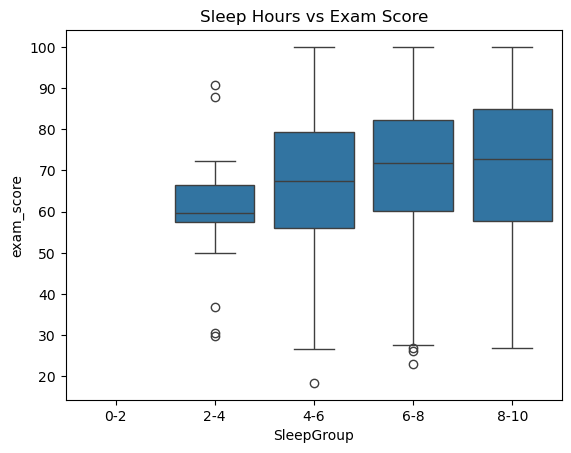

In [66]:
sns.boxplot(data=df, x='SleepGroup', y='exam_score')
plt.title("Sleep Hours vs Exam Score")
plt.show()

The correlation matrix showed just two variables with a strong correlation which means visualising data with a weak correlation or no correlation would not be provide enough insights.